In [310]:
import os
os.getcwd()

'/Users/sajin/ML/Exp'

In [311]:
path = '/Users/sajin/ML/datasets/nimhans/'
os.listdir(path)

['Output_1801_3600.csv', 'Output_pain.csv']

In [312]:
import pandas as pd
df = pd.read_csv(path+'Output_pain.csv')
df = pd.concat([df,pd.read_csv(path+'Output_1801_3600.csv')])
df.reset_index(inplace=True,drop=True)
df.shape

(5400, 18)

In [313]:
df.head()

,,Age,Weight(in Kgs),Gender,Heart rate,pulse rate,Systolic BP,Diastolic BP,BIS Value,Sleep Quality,SPO2,Pain Position,Medication,Dosage(mg),Label,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,p1,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3,NaN,NaN,NaN
1,p2,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2,NaN,L1,0.0
2,p3,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2,NaN,L2,40.0
3,p4,44,84.0,Male,85,81,130,90,74,0,91,Muscle,Morphine,100,L3,NaN,L3,70.0
4,p5,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2,NaN,NaN,NaN


In [314]:
for col in df.columns.to_list()[1:-3]:
    new = col.rstrip().lstrip()
    new = new.replace(' ','_').replace('(','_').replace(')','')
    print(col, new)
    df.rename(columns={col: new}, inplace=True)

Age Age
Weight(in Kgs) Weight_in_Kgs
Gender Gender
Heart rate Heart_rate
pulse rate pulse_rate
Systolic BP Systolic_BP
Diastolic BP Diastolic_BP
BIS Value BIS_Value
Sleep Quality Sleep_Quality
SPO2 SPO2
Pain Position Pain_Position
Medication Medication
Dosage(mg) Dosage_mg
Label Label


In [315]:
def get_data():
    data = df.iloc[:,1:-3]
    return data.copy()
data = get_data()
data.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
0,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3
1,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2
2,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2
3,44,84.0,Male,85,81,130,90,74,0,91,Muscle,Morphine,100,L3
4,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2


In [316]:
data.dtypes

Age                int64
Weight_in_Kgs    float64
Gender            object
Heart_rate        object
pulse_rate         int64
Systolic_BP        int64
Diastolic_BP       int64
BIS_Value          int64
Sleep_Quality      int64
SPO2               int64
Pain_Position     object
Medication        object
Dosage_mg         object
Label             object
dtype: object

In [317]:
#Seggregating numerical and categorical variables using data type.

numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['Age', 'Weight_in_Kgs', 'pulse_rate', 'Systolic_BP', 'Diastolic_BP', 'BIS_Value', 'Sleep_Quality', 'SPO2']

categorical columns =  ['Gender', 'Heart_rate', 'Pain_Position', 'Medication', 'Dosage_mg', 'Label']


In [318]:
data.describe(include='all')

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
count,5400.000000,5398.000000,5400,5400,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400,5400,5400,2700
unique,NaN,NaN,2,51,NaN,NaN,NaN,NaN,NaN,NaN,10,11,12,3
top,NaN,NaN,Female,80,NaN,NaN,NaN,NaN,NaN,NaN,No Pain,-,-,L2
freq,NaN,NaN,2863,222,NaN,NaN,NaN,NaN,NaN,NaN,2700,2700,2700,1387
mean,39.416481,62.620600,NaN,NaN,81.168333,126.916667,82.120000,55.389630,0.500370,95.014444,NaN,NaN,NaN,NaN
std,20.620789,10.419682,NaN,NaN,9.900168,6.917910,5.913437,15.380247,0.500046,2.337549,NaN,NaN,NaN,NaN
min,13.000000,40.000000,NaN,NaN,60.000000,115.000000,70.000000,30.000000,0.000000,71.000000,NaN,NaN,NaN,NaN
25%,20.000000,55.000000,NaN,NaN,74.000000,122.000000,77.000000,45.000000,0.000000,93.000000,NaN,NaN,NaN,NaN
50%,36.000000,64.000000,NaN,NaN,81.000000,125.000000,81.000000,52.000000,1.000000,95.000000,NaN,NaN,NaN,NaN
75%,57.000000,71.000000,NaN,NaN,89.000000,132.000000,87.000000,60.000000,1.000000,97.000000,NaN,NaN,NaN,NaN


In [319]:
data[data.Heart_rate==' ']

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
600,13,50.0,Male,,96,139,91,73,1,90,Knee Joint,Aspirin,150,L3
2400,17,49.0,Male,,93,137,91,76,1,93,Knee Joint,Aspirin,150,L3


In [320]:
data.loc[600,'Heart_rate'] = 81
data.loc[2400,'Heart_rate'] = 83

In [321]:
data[data.Heart_rate==' ']

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label


In [322]:
import numpy as np
data['Heart_rate'] = data.Heart_rate.astype(np.float64)
data['Dosage_mg'] = data.Dosage_mg.replace('-',0)
data['Dosage_mg'] = data.Dosage_mg.astype(int)

In [323]:
data.describe(include='all')

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
count,5400.000000,5398.000000,5400,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400,5400,5400.000000,2700
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,11,NaN,3
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Pain,-,NaN,L2
freq,NaN,NaN,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700,2700,NaN,1387
mean,39.416481,62.620600,NaN,83.015593,81.168333,126.916667,82.120000,55.389630,0.500370,95.014444,NaN,NaN,62.875926,NaN
std,20.620789,10.419682,NaN,10.948516,9.900168,6.917910,5.913437,15.380247,0.500046,2.337549,NaN,NaN,88.912402,NaN
min,13.000000,40.000000,NaN,60.000000,60.000000,115.000000,70.000000,30.000000,0.000000,71.000000,NaN,NaN,0.000000,NaN
25%,20.000000,55.000000,NaN,75.000000,74.000000,122.000000,77.000000,45.000000,0.000000,93.000000,NaN,NaN,0.000000,NaN
50%,36.000000,64.000000,NaN,82.000000,81.000000,125.000000,81.000000,52.000000,1.000000,95.000000,NaN,NaN,15.000000,NaN
75%,57.000000,71.000000,NaN,92.000000,89.000000,132.000000,87.000000,60.000000,1.000000,97.000000,NaN,NaN,100.000000,NaN


NaN    2700
L2     1387
L3      866
L1      447
Name: Label, dtype: int64


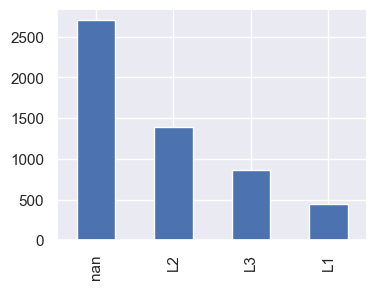

In [324]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
data.Label.value_counts(dropna=False).plot(kind='bar')
print(data.Label.value_counts(dropna=False))

<AxesSubplot: xlabel='Medication', ylabel='count'>

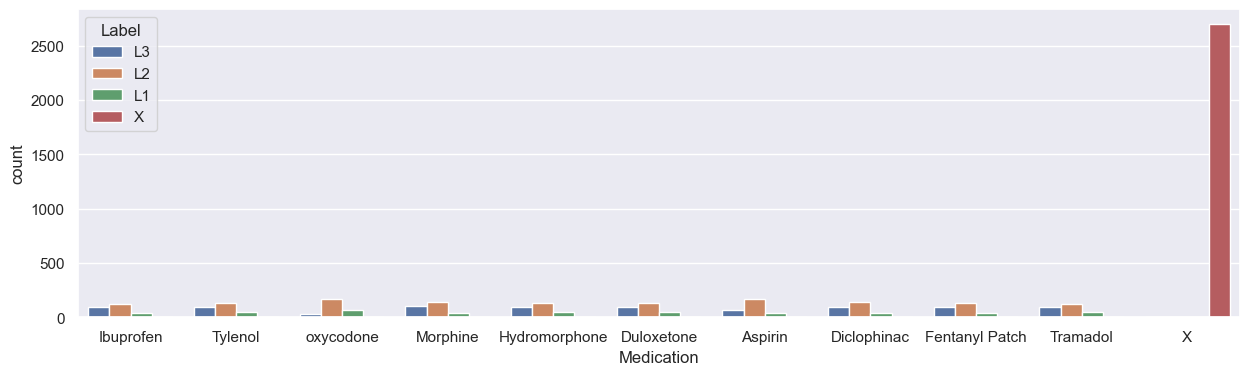

In [325]:
import seaborn as sns
plt.figure(figsize=(15,4))
temp = data.copy()
temp['Medication'] = temp.Medication.replace('-',np.nan).fillna('X')
temp['Label'] = temp.Label.fillna('X')
sns.countplot(x='Medication',hue='Label',data=temp)

### Data Looks highly unbalanced on Medicine class
#### Default Values in Medication and null values in Label need to be coded

In [326]:
data.Label.value_counts(dropna=False)
data.Label.fillna('L0',inplace=True)
data['Medication'] = data.Medication.replace('-','X')

In [327]:
print(data.Medication.value_counts(dropna=False))

X                 2700
Duloxetone         274
Aspirin            274
Tylenol            272
oxycodone          272
Morphine           272
Diclophinac        272
Fentanyl Patch     272
Hydromorphone      270
Tramadol           270
Ibuprofen          252
Name: Medication, dtype: int64


In [328]:
# Compute no of samples to pick from class X, average count across other medicine classes sounds good
N = data.Medication.value_counts(dropna=False)
N = int(np.median(N))
N

272

In [329]:
print(data.shape)
tempMedData = data.query("Medication=='X'").sample(n=N)
indexAllMed = data.query("Medication=='X'").index
# Drop All X Medication
data.drop(indexAllMed, inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape, tempMedData.shape

(5400, 14)


((2700, 14), (272, 14))

In [330]:
data = pd.concat([data, tempMedData])
data.reset_index(drop= True, inplace = True)
data.shape

(2972, 14)

In [331]:
data.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
0,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3
1,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2
2,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2
3,44,84.0,Male,85.0,81,130,90,74,0,91,Muscle,Morphine,100,L3
4,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2


In [332]:
data.Medication.value_counts(dropna=False), data.Label.value_counts(dropna=False)

(Duloxetone        274
 Aspirin           274
 Tylenol           272
 oxycodone         272
 Morphine          272
 Diclophinac       272
 Fentanyl Patch    272
 X                 272
 Hydromorphone     270
 Tramadol          270
 Ibuprofen         252
 Name: Medication, dtype: int64,
 L2    1387
 L3     866
 L1     447
 L0     272
 Name: Label, dtype: int64)

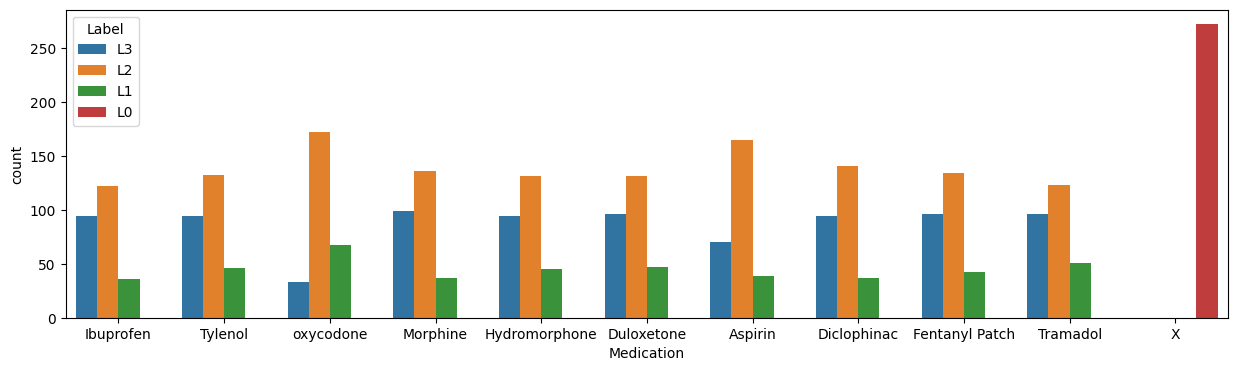

In [29]:
plt.figure(figsize=(15,4))
temp = data.copy()
sns.countplot(x='Medication',hue='Label',data=temp)
del temp

In [31]:
#Seggregate numerical and categorical variables using data type. We have corrected the data type in the previous step

numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['Age', 'Weight_in_Kgs', 'Heart_rate', 'pulse_rate', 'Systolic_BP', 'Diastolic_BP', 'BIS_Value', 'Sleep_Quality', 'SPO2', 'Dosage_mg']

categorical columns =  ['Gender', 'Pain_Position', 'Medication', 'Label']


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Weight_in_Kgs'}>,
        <AxesSubplot: title={'center': 'Heart_rate'}>],
       [<AxesSubplot: title={'center': 'pulse_rate'}>,
        <AxesSubplot: title={'center': 'Systolic_BP'}>,
        <AxesSubplot: title={'center': 'Diastolic_BP'}>],
       [<AxesSubplot: title={'center': 'BIS_Value'}>,
        <AxesSubplot: title={'center': 'Sleep_Quality'}>,
        <AxesSubplot: title={'center': 'SPO2'}>],
       [<AxesSubplot: title={'center': 'Dosage_mg'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

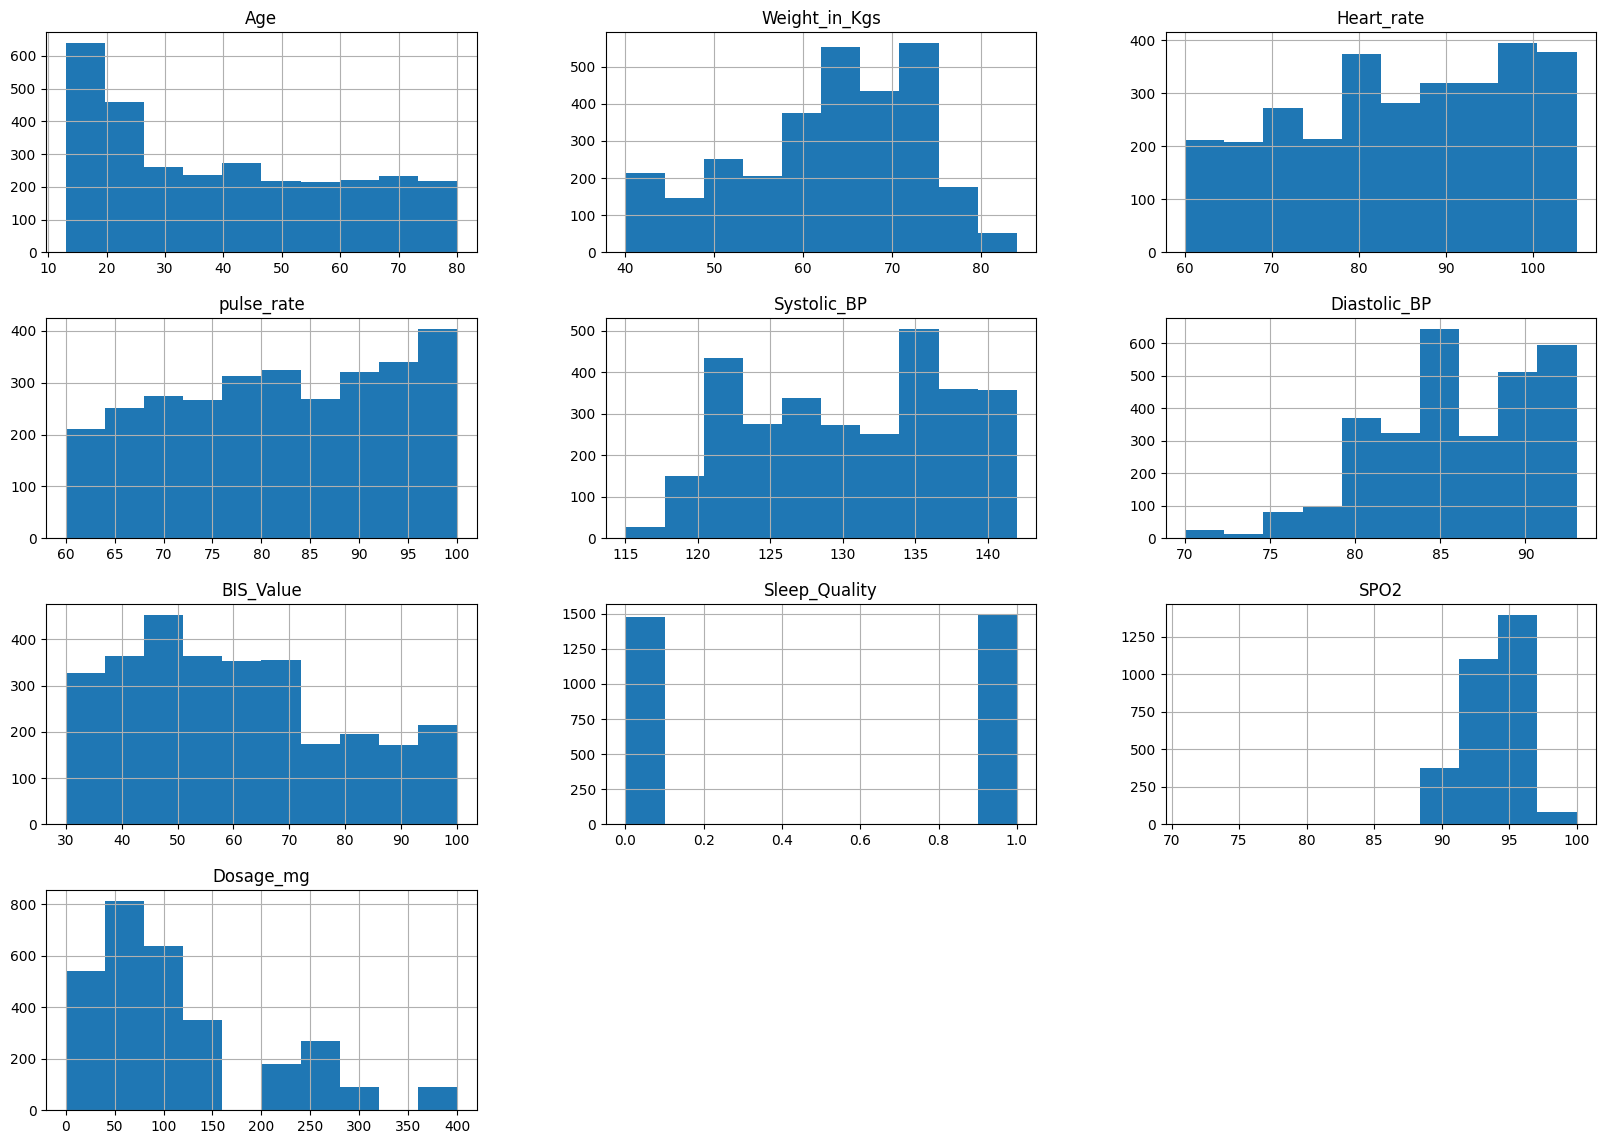

In [32]:
data[numerical].hist(figsize=(20,14))

## Let's try to transform features to a Gaussian distribution

<AxesSubplot: >

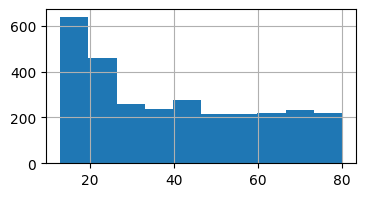

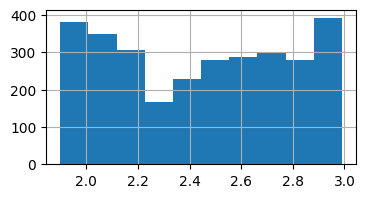

In [33]:
plt.figure(figsize=(4,2) )
data.Age.hist()
plt.figure(figsize=(4,2) )
np.power(data.Age,0.25).hist()
# np.exp(-1/data.Age).hist()

<AxesSubplot: >

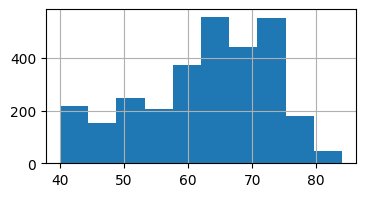

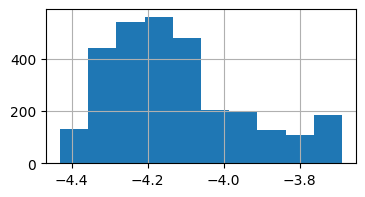

In [27]:
plt.figure(figsize=(4,2) )
data.Weight_in_Kgs.hist()
plt.figure(figsize=(4,2) )
# boxcox(data.Weight_in_Kgs,0).hist()
np.log(1/data.Weight_in_Kgs).hist()

### Not much change in distribution

<AxesSubplot: >

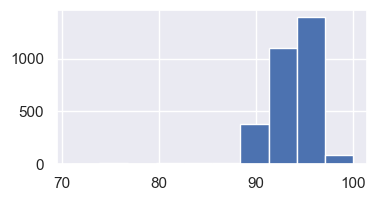

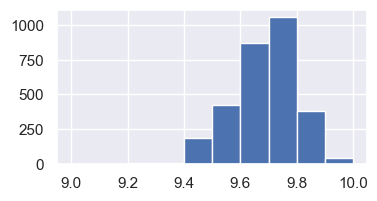

In [105]:
plt.figure(figsize=(4,2) )
data.SPO2.hist()

plt.figure(figsize=(4,2) )
np.power(data[data.SPO2>80].SPO2,0.5).hist()


In [110]:
(data.SPO2.value_counts(dropna=False) )

95     696
93     534
96     362
97     337
94     335
92     231
91     190
90     185
98      41
99      38
100      4
89       3
85       3
74       2
87       2
73       1
88       1
81       1
86       1
71       1
82       1
79       1
75       1
80       1
Name: SPO2, dtype: int64

<AxesSubplot: >

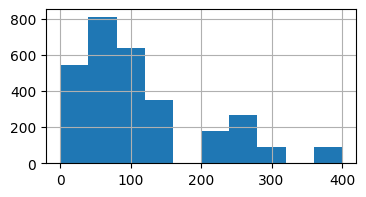

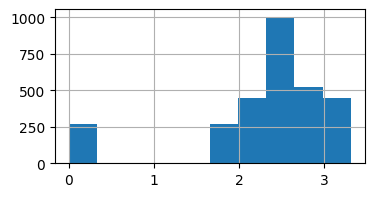

In [34]:
plt.figure(figsize=(4,2) )
data.Dosage_mg.hist()

plt.figure(figsize=(4,2) )
np.power(data.Dosage_mg,0.2).hist()


##### This looks useful transformation

<AxesSubplot: >

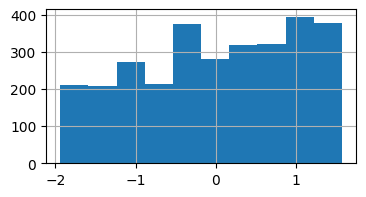

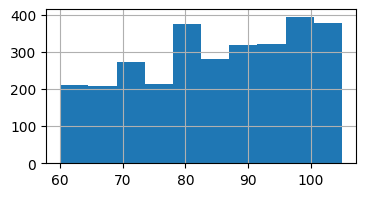

In [35]:
from scipy.stats import boxcox
plt.figure(figsize=(4,2) )
((data.Heart_rate- np.mean(data.Heart_rate))/np.std(data.Heart_rate)).hist()

plt.figure(figsize=(4,2) )
data.Heart_rate.hist()

In [31]:
# data.Heart_rate.value_counts()

In [36]:
if 'Sleep_Quality' in numerical:
    numerical.remove('Sleep_Quality')
if 'Sleep_Quality' not in categorical:
    categorical.append('Sleep_Quality')
numerical,categorical

(['Age',
  'Weight_in_Kgs',
  'Heart_rate',
  'pulse_rate',
  'Systolic_BP',
  'Diastolic_BP',
  'BIS_Value',
  'SPO2',
  'Dosage_mg'],
 ['Gender', 'Pain_Position', 'Medication', 'Label', 'Sleep_Quality'])

In [37]:
data.Pain_Position.value_counts(dropna=False)

Abdomine        544
Fybromialgia    544
Muscle          272
Knee Joint      272
Joint pain      272
No Pain         272
Neck            270
Shoulder        270
Lower Back      254
Shoulder          2
Name: Pain_Position, dtype: int64

L2    1387
L3     866
L1     447
L0     272
Name: Label, dtype: int64


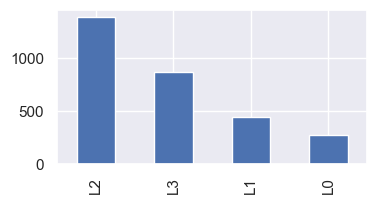

In [41]:
plt.figure(figsize=(4,2))
data.Label.value_counts(dropna=False).plot(kind='bar')
print(data.Label.value_counts(dropna=False))

In [42]:
data.Label.value_counts(dropna=False)

L2    1387
L3     866
L1     447
L0     272
Name: Label, dtype: int64

In [43]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
scaler = MinMaxScaler(feature_range=(0,1))
encoder = LabelEncoder()

In [44]:
data.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
0,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3
1,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2
2,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2
3,44,84.0,Male,85.0,81,130,90,74,0,91,Muscle,Morphine,100,L3
4,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2


In [45]:
data.Medication.value_counts(dropna=False)

Duloxetone        274
Aspirin           274
Tylenol           272
oxycodone         272
Morphine          272
Diclophinac       272
Fentanyl Patch    272
X                 272
Hydromorphone     270
Tramadol          270
Ibuprofen         252
Name: Medication, dtype: int64

<AxesSubplot: xlabel='Medication', ylabel='count'>

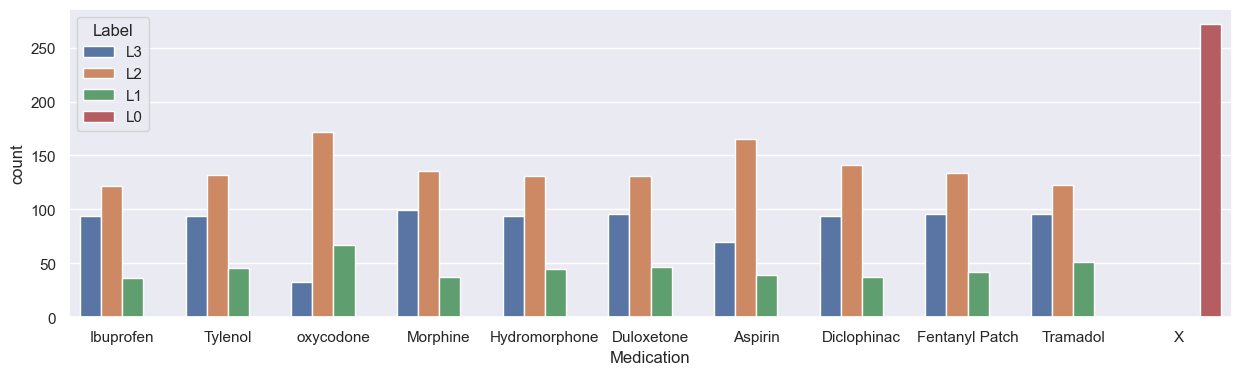

In [46]:
plt.figure(figsize=(15,4))
temp = data.copy()
# temp['Medication'] = temp.Medication.replace('-',np.nan).fillna('X')
temp['Label'] = temp.Label.fillna('X')
sns.countplot(x='Medication',hue='Label',data=temp)


In [47]:
# plt.figure(figsize=(6,3))
# data['Age_1'] = np.power(data.Age,0.25)
# data.Age_1.hist()

In [245]:
# plt.figure(figsize=(5,3))
# data['SPO2_1'] = np.power(data.SPO2,0.25)
# data.SPO2_1.hist()
np.power(3,0.2), np.exp(5* (np.log(np.power(3,0.2))) )

(1.2457309396155174, 3.000000000000001)

### Below function transforms the Dosage distribution to a Gaussian

<AxesSubplot: >

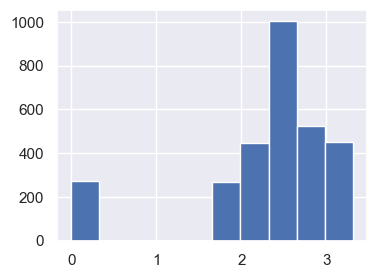

In [333]:
plt.figure(figsize=(4,3))
data['Dosage_mg_1'] = np.power(data.Dosage_mg,0.2)
data.Dosage_mg_1.hist()

In [51]:
sparse_features = ['Gender','Sleep_Quality','Pain_Position','Medication','Label']
dense_features = [x for x in data.columns if x not in sparse_features]
sparse_features, dense_features

(['Gender', 'Sleep_Quality', 'Pain_Position', 'Medication', 'Label'],
 ['Age',
  'Weight_in_Kgs',
  'Heart_rate',
  'pulse_rate',
  'Systolic_BP',
  'Diastolic_BP',
  'BIS_Value',
  'SPO2',
  'Dosage_mg',
  'Dosage_mg_1'])

In [52]:
data.dtypes

Age                int64
Weight_in_Kgs    float64
Gender            object
Heart_rate       float64
pulse_rate         int64
Systolic_BP        int64
Diastolic_BP       int64
BIS_Value          int64
Sleep_Quality      int64
SPO2               int64
Pain_Position     object
Medication        object
Dosage_mg          int64
Label             object
Dosage_mg_1      float64
dtype: object

### Normalize Sparse Features using Encoder and Scale the Dense Features

In [53]:
train = data.copy()
for sparse in sparse_features:
    train[sparse] = encoder.fit_transform(train[sparse])
train[dense_features] = scaler.fit_transform(train[dense_features])
train.shape, data.shape

((2972, 15), (2972, 15))

In [54]:
train.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label,Dosage_mg_1
0,0.537313,0.802273,1,0.571111,0.600,0.962963,0.956522,0.714286,0,0.655172,4,5,0.375,3,0.821876
1,0.492537,0.481818,0,0.448889,0.375,0.259259,0.478261,0.314286,1,0.793103,9,8,0.250,2,0.757858
2,0.089552,0.250000,0,0.513333,0.475,0.481481,0.652174,0.485714,1,0.724138,0,10,0.300,2,0.786003
3,0.462687,1.000000,1,0.555556,0.525,0.555556,0.869565,0.628571,0,0.689655,5,6,0.250,3,0.757858
4,0.417910,0.568182,0,0.468889,0.375,0.333333,0.695652,0.514286,0,0.827586,6,4,0.225,2,0.742056


In [55]:
train.Label.value_counts(dropna=False)

2    1387
3     866
1     447
0     272
Name: Label, dtype: int64

### Choose features correlating well with target variables so model can learn from them

### Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

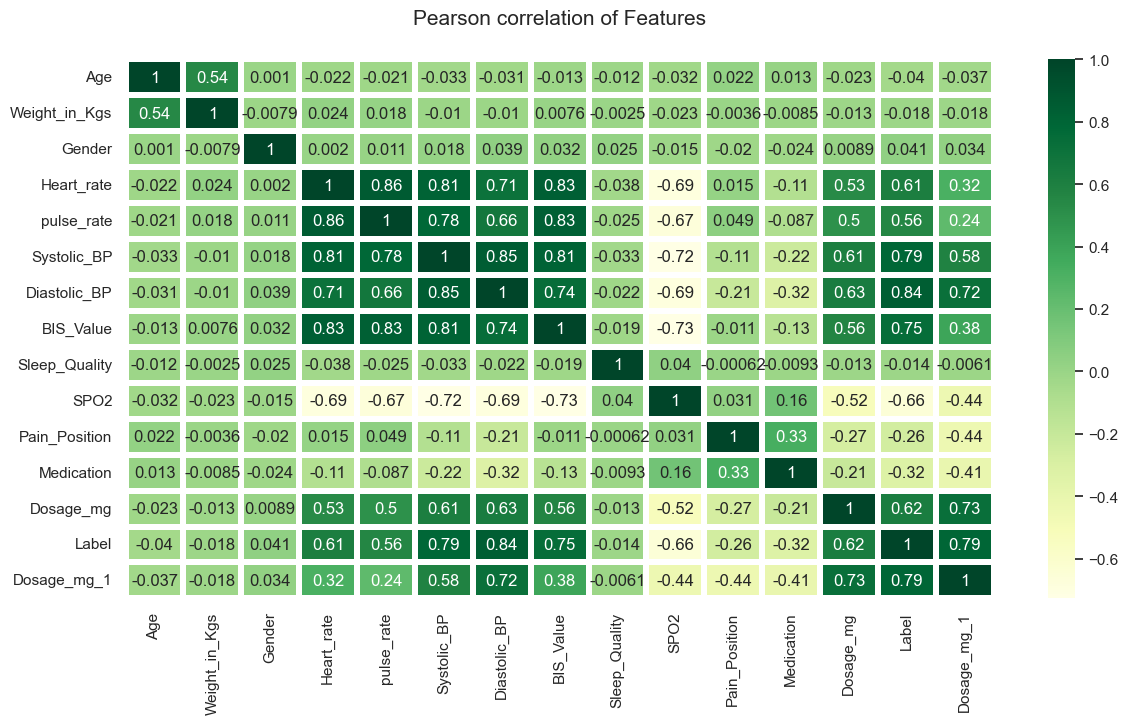

In [56]:
# Pearson correlation table to find the relationship with output of all input features. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
corr = train.corr()
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

### Find out features highly correlated with target variables

In [57]:
corr['Medication'][np.abs(corr['Medication'])>0.2]

Systolic_BP     -0.224214
Diastolic_BP    -0.316881
Pain_Position    0.330138
Medication       1.000000
Dosage_mg       -0.207209
Label           -0.323053
Dosage_mg_1     -0.406659
Name: Medication, dtype: float64

In [58]:
corr['Dosage_mg_1'][np.abs(corr['Dosage_mg_1'])>0.3]

Heart_rate       0.317798
Systolic_BP      0.584127
Diastolic_BP     0.719922
BIS_Value        0.382752
SPO2            -0.437809
Pain_Position   -0.441312
Medication      -0.406659
Dosage_mg        0.725302
Label            0.791468
Dosage_mg_1      1.000000
Name: Dosage_mg_1, dtype: float64

In [59]:
corr['Label'][np.abs(corr['Label'])>0.3]

Heart_rate      0.612337
pulse_rate      0.555449
Systolic_BP     0.785064
Diastolic_BP    0.842518
BIS_Value       0.746247
SPO2           -0.655866
Medication     -0.323053
Dosage_mg       0.622005
Label           1.000000
Dosage_mg_1     0.791468
Name: Label, dtype: float64

#### Assume features correlating each others are useful for final model an result interpretation

<AxesSubplot: xlabel='Label', ylabel='count'>

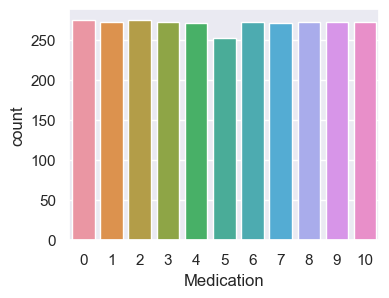

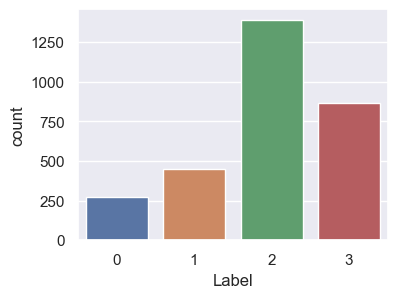

In [62]:
plt.figure(figsize=(4,3))
sns.countplot(x='Medication',data=train)

plt.figure(figsize=(4,3))
sns.countplot(x='Label',data=train)

#### The medication names to predict looks balanced

In [55]:
train.Medication.value_counts(dropna=False)

2     274
0     274
8     272
10    272
6     272
1     272
3     272
9     272
4     270
7     270
5     252
Name: Medication, dtype: int64

In [77]:
train.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label,Dosage_mg_1
0,0.537313,0.802273,1,0.571111,0.600,0.962963,0.956522,0.714286,0,0.655172,4,5,0.375,3,0.821876
1,0.492537,0.481818,0,0.448889,0.375,0.259259,0.478261,0.314286,1,0.793103,9,8,0.250,2,0.757858
2,0.089552,0.250000,0,0.513333,0.475,0.481481,0.652174,0.485714,1,0.724138,0,10,0.300,2,0.786003
3,0.462687,1.000000,1,0.555556,0.525,0.555556,0.869565,0.628571,0,0.689655,5,6,0.250,3,0.757858
4,0.417910,0.568182,0,0.468889,0.375,0.333333,0.695652,0.514286,0,0.827586,6,4,0.225,2,0.742056


In [86]:
def fun_clean_data(data):
    sampled_data = data.copy() #sample(frac=0.1, random_state=42)
    sampled_data = sampled_data.dropna(axis=0)
    sampled_data.reset_index(inplace=True)
    #Exclude features that do not have a Gaussian distribution
    exclude_train = ['Age','Age_1','Dosage_mg','index','Gender','Sleep_Quality','SPO2_1']
    X = sampled_data.loc[:,~sampled_data.columns.isin(exclude_train)]#.drop(exclude_train, axis=1)
#     y = sampled_data['Dosage_mg_1','Medication','Label']
    return X

### Finalize the features for training and target variables

In [123]:
from sklearn.model_selection import train_test_split
X = fun_clean_data(train)

X_train, X_test, y_train, y_test = train_test_split(X.loc[:,~X.columns.isin(['Medication','Dosage_mg_1','Label'])], X[['Medication','Dosage_mg_1','Label']], test_size=0.10, random_state=1, stratify=X.Medication)

del X


In [124]:
X_train.shape,X_test.shape

((2673, 8), (297, 8))

<AxesSubplot: xlabel='Label', ylabel='count'>

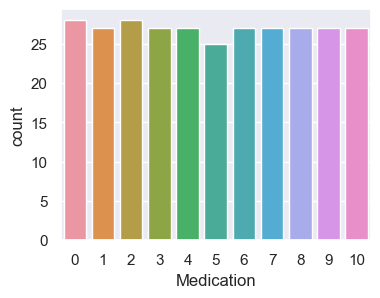

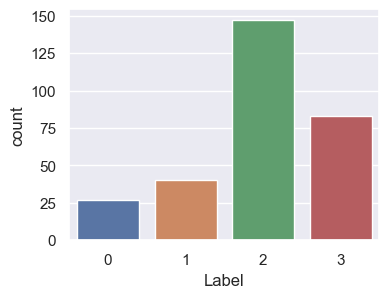

In [127]:
plt.figure(figsize=(4,3))
sns.countplot(x='Medication',data=y_test)

plt.figure(figsize=(4,3))
sns.countplot(x='Label',data=y_test)

In [128]:
y_train.head()

,Medication,Dosage_mg_1,Label
1318,4,0.742056,3
2030,10,0.659754,2
943,5,0.910282,2
1735,7,0.757858,1
2629,7,0.757858,2


In [129]:
np.where(pd.isnull(X_train)), np.where(pd.isnull(X_test))

((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

### Let's take a look at the distribution of selected feature and see if they follow Gaussian

array([[<AxesSubplot: title={'center': 'Weight_in_Kgs'}>,
        <AxesSubplot: title={'center': 'Heart_rate'}>,
        <AxesSubplot: title={'center': 'pulse_rate'}>],
       [<AxesSubplot: title={'center': 'Systolic_BP'}>,
        <AxesSubplot: title={'center': 'Diastolic_BP'}>,
        <AxesSubplot: title={'center': 'BIS_Value'}>],
       [<AxesSubplot: title={'center': 'SPO2'}>,
        <AxesSubplot: title={'center': 'Pain_Position'}>,
        <AxesSubplot: >]], dtype=object)

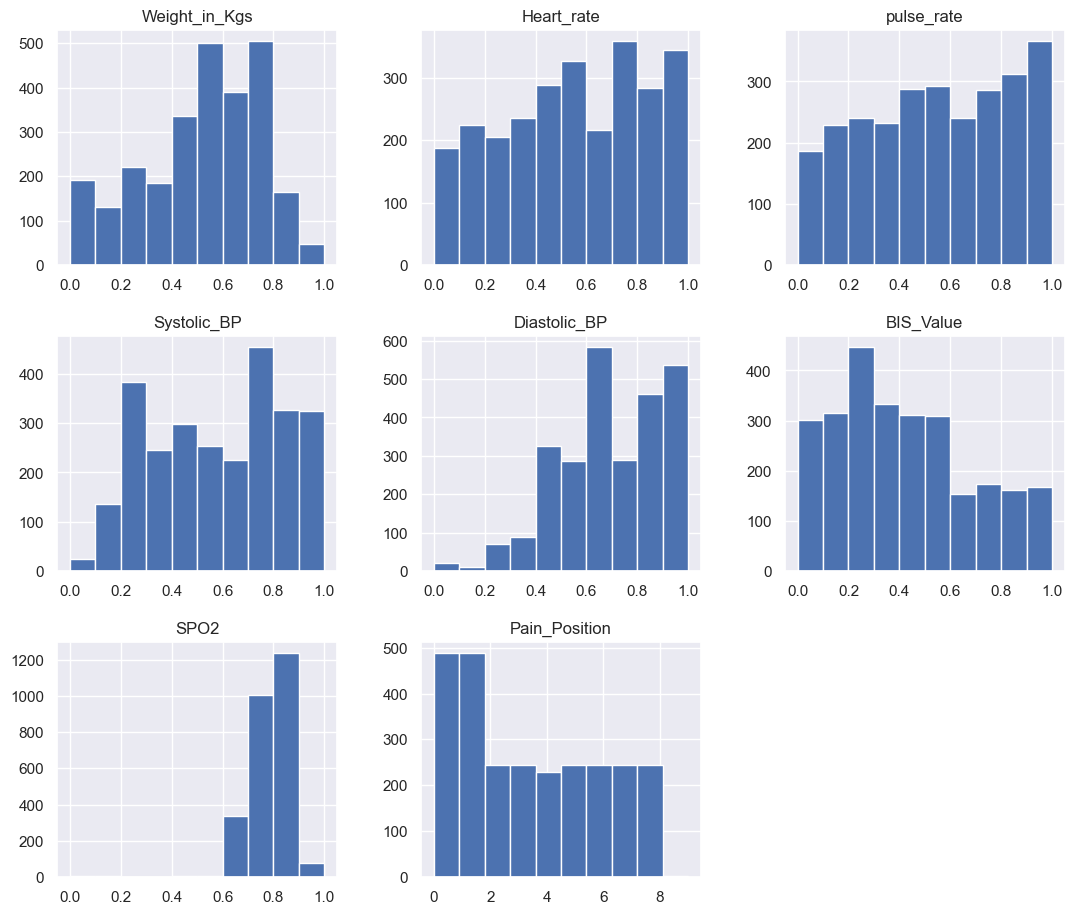

In [130]:
# X.dropna(inplace=True), X.shape
X_train.hist(figsize=(13,11))

<AxesSubplot: >

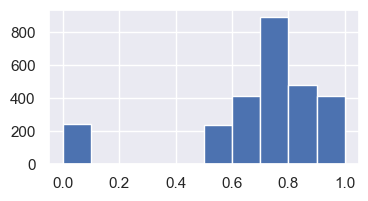

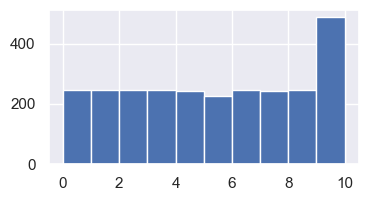

In [132]:
plt.figure(figsize=(4,2) )
y_train.Dosage_mg_1.hist()
plt.figure(figsize=(4,2) )
y_train.Medication.hist()

In [98]:
import torch
import torch.nn as nn

# embed_features = {}
# X_temp = torch.empty((X.shape[0],1))
# print(X_temp.shape, len(sparse_features) )
# for col in sparse_features:
#     if col in exclude_train:
#         continue
#     emb = nn.Embedding( len(X[col].unique()),1 )
#     embed_features[col] = emb
#     #print(emb(torch.tensor(X[col], dtype=torch.int32)).shape, X_temp.shape )
#     X_temp = torch.cat( (X_temp, embed_features[col](torch.tensor(X[col], dtype=torch.int32) ) ), dim=1)
#     print('Sparse',col,' ',emb.weight.shape)
# X_temp = X_temp[:,1:]

# for col in dense_features:
#     if col in exclude_train:
#         continue
#     print('Dense',col, ' ',torch.tensor(X[col]).view(-1,1).shape)
#     X_temp = torch.cat( (X_temp, torch.tensor(X[col]).view(-1,1) ), dim = 1 )
# print(X_temp.shape)
# del X_temp

/Users/sajin/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load X and target Y datasets

In [133]:
# if 'X_temp' not in dir():
#     X_train = torch.tensor(X_train.values)
#     X_test = torch.tensor(X_test.values)
# else:
#     X_train = X_temp.clone()
#     print('Loading embeddings....')
#     del X_temp
# y_train = torch.tensor(y_train.values)
# y_test = torch.tensor(y_test.values)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2673, 8), (2673, 3), (297, 8), (297, 3))

In [122]:
# y_train[:,0].unique() , y_train[:,1].unique(), y_train[:,2].shape
X_train.head()

,Weight_in_Kgs,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,SPO2,Pain_Position,Medication,Label,Dosage_mg_1
1318,0.363636,0.888889,0.925,0.814815,0.956522,0.800000,0.758621,6,4,3,0.742056
2030,0.454545,0.644444,0.600,0.703704,0.652174,0.400000,0.827586,0,10,2,0.659754
943,0.727273,0.444444,0.425,0.703704,0.695652,0.528571,0.827586,4,5,2,0.910282
1735,0.727273,0.444444,0.075,0.444444,0.608696,0.128571,0.827586,1,7,1,0.757858
2629,0.659091,0.044444,0.325,0.481481,0.434783,0.200000,0.862069,1,7,2,0.757858


In [142]:
y_train.head()

,Medication,Dosage_mg_1,Label
1318,4,0.742056,3
2030,10,0.659754,2
943,5,0.910282,2
1735,7,0.757858,1
2629,7,0.757858,2


In [177]:
torch.tensor(y_train.values)[:,1].unique(), torch.tensor(y_train.values)[:,0].unique(), torch.tensor(y_train.values,dtype=torch.long)[:,2].unique()


(tensor([0.0000, 0.5957, 0.6598, 0.7155, 0.7421, 0.7579, 0.7860, 0.8219, 0.8706,
         0.9103, 0.9441, 1.0000], dtype=torch.float64),
 tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        dtype=torch.float64),
 tensor([0, 1, 2, 3]))

## Data Loader

In [417]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    if split == 'train':
        X_torch, y_torch, y_torch_cls = torch.tensor(X_train.values), torch.tensor(y_train.values)[:,1], torch.tensor(y_train.values,dtype=torch.long)[:,[0,2]] 
    else: 
        X_torch, y_torch, y_torch_cls = torch.tensor(X_test.values), torch.tensor(y_test.values)[:,1], torch.tensor(y_test.values,dtype=torch.long)[:,[0,2]] 
    
    ix = torch.randint(X_torch.shape[0], (batch_size,)) # generate 32 random indexes of feature set
    #print(ix)
    x = torch.stack( [X_torch[i].float() for i in ix] )
    reg_target = torch.stack([y_torch[i].float() for i in ix])
    class_med_target = torch.stack([y_torch_cls[:,0][i] for i in ix])
    class_pain_target = torch.stack([y_torch_cls[:,1][i] for i in ix])
    #target = target.view(-1,1)
    #print('Function : ',x.shape, target.shape)
    x, reg_target, class_med_target, class_pain_target = x.to(device), reg_target.to(device), class_med_target.to(device),class_pain_target.to(device)
    return x, reg_target, class_med_target, class_pain_target

In [418]:
from sklearn.metrics import accuracy_score


## 1. Simple Classification and Regression Network Model

In [443]:
import torch
import torch.nn as nn
import torch.optim as optim


batch_size = 16 # how many independent feature vectors will we process in parallel?
n_epochs = 100
max_iters = (X_train.shape[0]//batch_size) + 1 #10000
eval_interval = 200
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = int(X_train.shape[0]/batch_size)

n_tab_features = X_train.shape[1]

num_classes = len(y_train.Medication.unique())
n_pain_cls = len(y_train.Label.unique())
print(num_classes,' Medicine classes ', num_pain_cls,' Pain Classes ',n_tab_features,' Features',torch.cuda.is_available())
n_hidden = 64

@torch.no_grad()
def estimate_loss_1():
    out = {}
    model_1.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        losses_dosage_y = torch.zeros(eval_iters)
        losses_medicine_class = torch.zeros(eval_iters)
        losses_pain_class = torch.zeros(eval_iters)
        medicine_class_acc = torch.zeros(eval_iters)
        pain_class_acc = torch.zeros(eval_iters)
        for k in range(eval_iters):
            
            X, dosage_reg_y, med_class_y, pain_class_y = get_batch(split)
            
            total_loss,dos_regr_loss, med_cls_loss,pain_cls_loss,pred_dos, pred_med_cls, pred_cls_pain = model_1( X, dosage_reg_y, med_class_y, pain_class_y)
            
            #print(predicted_class, classification_targets)
            medicine_class_acc[k] = (torch.sum( pred_med_cls == med_class_y)/len(med_class_y) )*100
            pain_class_acc[k] = (torch.sum( pred_cls_pain == pain_class_y)/len(pain_class_y) )*100
            
            losses[k] = total_loss.item()
            losses_dosage_y[k] = dos_regr_loss.item()
            losses_medicine_class[k] = med_cls_loss.item()
            losses_pain_class[k] = pain_cls_loss.item()
        out[split] = losses.mean()
        out['loss_dosage'] = losses_dosage_y.mean()
        out['loss_medication'] = losses_medicine_class.mean()
        out['medicine_class_acc'] = medicine_class_acc.mean()
        out['loss_pain_cls'] = losses_pain_class.mean()
        out['pain_cls_acc'] = pain_class_acc.mean()
        
    model_1.train()
    return out

# Define the model
class DosagePredictionModel(nn.Module):
    def __init__(self, n_tab_features, n_pain_cls):
        super(DosagePredictionModel, self).__init__()
        self.fc1 = nn.Linear(n_tab_features, n_hidden)  # n_tab_features input features
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.fc3 = nn.Linear(n_hidden, n_hidden//2)
        self.fc4 = nn.Linear(n_hidden//2, n_hidden//2)
        self.bn5 = nn.BatchNorm1d(n_hidden//2)
        self.fc6 = nn.Linear(n_hidden//2, num_classes)  # Output for Medicine classification
        self.fc7 = nn.Linear(n_hidden//2, n_pain_cls)  # Output for Pain classification
        self.fc8 = nn.Linear(n_hidden//2, 1)  # Output for regression
        

    def forward(self, x, regression_targets=None,classification_targets=None, pain_cls_tgt=None ):
        x = torch.relu(self.fc1(x))
        x = x + torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = x + torch.relu(self.fc4(x))
        x = self.bn5(x)

        regression_output = self.fc8(x)  # Regression output
        regression_y = regression_output
        
        # Medicine Classification Layer
        output_classification = self.fc6(x)
        output_classification = torch.softmax(output_classification,dim=1)
        pred_cls_y = torch.argmax(output_classification, dim = 1)
        
        # Pain Classification Layer
        pain_output_cls = self.fc7(x)
        pain_output_cls = torch.softmax(pain_output_cls,dim=1)
        pred_pain_cls_y = torch.argmax(pain_output_cls, dim = 1)
        
        if (classification_targets is None) or (regression_targets is None) or (pain_cls_tgt is None):
            print('Inference Mode')
            loss, regression_loss, med_cls_loss, pain_cls_loss = None, None, None, None
        else:
            loss_fn = nn.SmoothL1Loss()  # mean square error
            regression_loss = loss_fn(regression_output, regression_targets.view(-1,1))
            #Classification
            med_cls_loss = nn.CrossEntropyLoss()(output_classification, classification_targets )
            #pain_class
            pain_cls_loss = nn.CrossEntropyLoss()(pain_output_cls, pain_cls_tgt )
            
            weight_dosage, weight_med_cls = 0.2, 0.3
            loss = weight_dosage * regression_loss + weight_med_cls * med_cls_loss + (1-(weight_dosage+weight_med_cls))*pain_cls_loss
        return loss,regression_loss,med_cls_loss,pain_cls_loss, regression_y, pred_cls_y, pred_pain_cls_y

# Instantiate the model

model_1 = DosagePredictionModel(n_tab_features, n_pain_cls)
m1 = model_1.to(device)

# print the number of parameters in the model
print(sum(p.numel() for p in m1.parameters())/1e3, 'K parameters')
# Define loss functions for classification and regression

# Define optimizer
optimizer = optim.AdamW(model_1.parameters(), lr=learning_rate)

val_curve = {}
print('Training for ',n_epochs,' epochs with iterations ', max_iters)
import time
run_time = 0
for epoch in range(n_epochs):
    t0 = time.time()
    for iter in range(max_iters):
        
        # sample a batch of data
        x, reg_target, cls_med_target, cls_pain_target = get_batch('train')
 
        # evaluate the loss
        loss,_,_,_,_, _, _ = model_1( x, reg_target, cls_med_target, cls_pain_target)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()
    
    # Estimate the loss
    losses = estimate_loss_1()
    
    val_curve[epoch] = losses
    run_time = run_time + (time.time() - t0)
    print(f"Epoch{epoch}:step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}\
,loss dosage {losses['loss_dosage']:.4f},loss Medication {losses['loss_medication']:.4f}\
, Acc Medication:{losses['medicine_class_acc']:.2f} , Acc Pain:{losses['pain_cls_acc']:.2f}" )

print(f"Run Time {(run_time/n_epochs):.2f}")



11  Medicine classes  4  Pain Classes  8  Features False
8.464 K parameters
Training for  100  epochs with iterations  168
Epoch0:step 167: train loss 1.4082, val loss 1.4098,loss dosage 0.2906,loss Medication 2.3567, Acc Medication:15.87 , Acc Pain:58.23
Epoch1:step 167: train loss 1.3630, val loss 1.3585,loss dosage 0.2577,loss Medication 2.3248, Acc Medication:29.27 , Acc Pain:59.81
Epoch2:step 167: train loss 1.3122, val loss 1.3110,loss dosage 0.1834,loss Medication 2.2970, Acc Medication:34.02 , Acc Pain:65.91
Epoch3:step 167: train loss 1.2740, val loss 1.2763,loss dosage 0.1499,loss Medication 2.2639, Acc Medication:37.72 , Acc Pain:71.11
Epoch4:step 167: train loss 1.2462, val loss 1.2490,loss dosage 0.1137,loss Medication 2.2294, Acc Medication:43.75 , Acc Pain:70.43
Epoch5:step 167: train loss 1.2148, val loss 1.2163,loss dosage 0.0741,loss Medication 2.2100, Acc Medication:46.78 , Acc Pain:78.82
Epoch6:step 167: train loss 1.1912, val loss 1.1931,loss dosage 0.0331,loss Med

Epoch61:step 167: train loss 0.9050, val loss 0.9176,loss dosage 0.0045,loss Medication 1.7337, Acc Medication:81.51 , Acc Pain:95.55
Epoch62:step 167: train loss 0.9026, val loss 0.9136,loss dosage 0.0042,loss Medication 1.7251, Acc Medication:83.23 , Acc Pain:96.59
Epoch63:step 167: train loss 0.9024, val loss 0.9125,loss dosage 0.0042,loss Medication 1.7257, Acc Medication:83.53 , Acc Pain:97.12
Epoch64:step 167: train loss 0.9008, val loss 0.9109,loss dosage 0.0030,loss Medication 1.7226, Acc Medication:83.16 , Acc Pain:96.82
Epoch65:step 167: train loss 0.9019, val loss 0.9168,loss dosage 0.0066,loss Medication 1.7212, Acc Medication:82.56 , Acc Pain:95.55
Epoch66:step 167: train loss 0.9030, val loss 0.9150,loss dosage 0.0034,loss Medication 1.7258, Acc Medication:82.49 , Acc Pain:95.73
Epoch67:step 167: train loss 0.9029, val loss 0.9129,loss dosage 0.0034,loss Medication 1.7257, Acc Medication:83.50 , Acc Pain:95.88
Epoch68:step 167: train loss 0.9001, val loss 0.9114,loss dosa

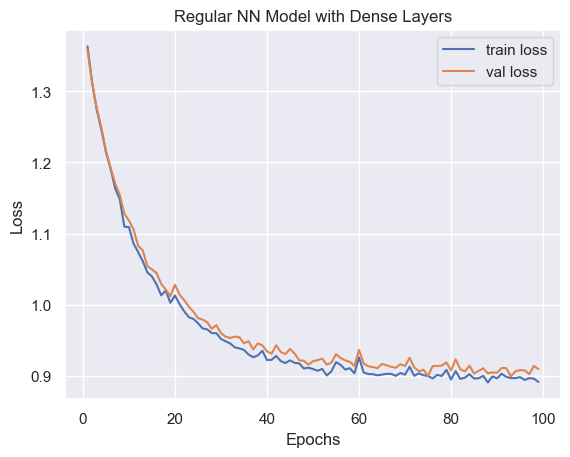

In [449]:
train_loss = [val_curve[x]['train'] for x in val_curve.keys() if x>0]
val_loss = [val_curve[x]['val'] for x in val_curve.keys() if x>0]
epochs_x = [x for x in val_curve.keys() if x>0]
plt.title('Regular NN Model with Dense Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs_x, train_loss, label='train loss')
plt.plot(epochs_x, val_loss, label='val loss')
plt.legend(loc='best')

In [385]:
path = os.getcwd()
model_2_path = path + '/med_dos_pain_1'
torch.save(model_1.state_dict(), model_2_path)
print('Saved in', model_2_path)

Saved in /Users/sajin/ML/Exp/med_dos_pain_1


In [423]:

# Sample a batch from the dataset
xb, dosage_y, medicine_class_y, pain_cls = get_batch('test')

#Predict
_, _, _, _, pred_dosage, pred_medicine_class, pred_pain_cls = model_1(xb)

#Encoders and Scalers
medicine_encoded = encoder.fit(data.Medication)
encoder = LabelEncoder()
pain_encoded = encoder.fit(data.Label)
dosage_scaler = scaler.fit( data['Dosage_mg_1'].to_numpy().reshape(-1,1) )

#print('Medicine codes ', encoder.fit(data.Medication.unique() ) )
medicine_tuple = zip(medicine_encoded.inverse_transform(pred_medicine_class),medicine_encoded.inverse_transform(medicine_class_y) )
pain_tuple = zip(pain_encoded.inverse_transform(pred_pain_cls),pain_encoded.inverse_transform(pain_cls) )
dosage_tuple = zip(fun_tran(dosage_scaler.inverse_transform(pred_dosage.detach().numpy()) ), 
                   fun_tran(dosage_scaler.inverse_transform(dosage_y.detach().numpy().reshape(-1,1)) ) )

print('Pred    =>       Actual ')
print('==========================')
for a,b in (medicine_tuple):
    print(a,'      ',b)

print('==========================')
print('Pred    =>       Actual ')
print('==========================')
for a,b in (dosage_tuple):
    print(a,'      ',b)

print('==========================')
print('Pred    =>       Actual ')
print('==========================')
for a,b in (pain_tuple):
    print(a,'      ',b)
#pred_dosage, dosage_scaler.inverse_transform(pred_dosage.detach().numpy() )


Inference Mode
Pred    =>       Actual 
Aspirin        Aspirin
oxycodone        oxycodone
X        X
oxycodone        Diclophinac
Tramadol        Tramadol
Duloxetone        Tramadol
Fentanyl Patch        Fentanyl Patch
Duloxetone        Duloxetone
Hydromorphone        Hydromorphone
Hydromorphone        Hydromorphone
Duloxetone        Duloxetone
Tramadol        Duloxetone
X        X
Morphine        Morphine
Diclophinac        Diclophinac
Tramadol        Duloxetone
Pred    =>       Actual 
72        50
79        50
0        0
101        75
215        200
112        99
131        99
93        99
69        29
11        29
164        150
127        99
0        0
326        50
118        150
248        250
Pred    =>       Actual 
L2        L2
L2        L2
L0        L0
L2        L2
L2        L2
L2        L1
L3        L3
L1        L1
L2        L2
L0        L2
L2        L2
L1        L1
L0        L0
L2        L2
L2        L2
L3        L3


# 2. Transformer Model

In [441]:
# hyperparameters
batch_size = 32 # how many independent feature vectors will we process in parallel?
n_epochs = 100
max_iters = (X_train.shape[0]//batch_size) + 1 #10000
eval_interval = 200
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = int(X_train.shape[0]/batch_size)
dropout = 0.0
n_heads = 4
n_hidden_units = 16

num_classes = len(y_train.Medication.unique())
n_pain_cls = len(y_train.Label.unique())
print(num_classes,' Medicine classes ', n_pain_cls,' Pain Classes ',n_tab_features,' Features',torch.cuda.is_available())

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time

class TransformerModel(nn.Module):
    def __init__(self, tabular_feature_dim, num_heads, hidden_dim, num_layers):
        super(TransformerModel, self).__init__()

        # Tabular data encoder
        self.tabular_encoder = nn.Sequential(
            nn.Linear(tabular_feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Transformer encoder
        input_hidden_dim = hidden_dim
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(input_hidden_dim, num_heads, dim_feedforward=4*hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers)

        # Output layer
        self.output_layer = nn.Linear(input_hidden_dim, 1) # Regressor Head
        
        # Classification Head
#         self.output_layer1 = nn.Sequential(
#             nn.Linear(input_hidden_dim, 64),
#             nn.ReLU(),
#             nn.Linear(64, num_classes)
#         )
        self.output_layer1 = nn.Linear(input_hidden_dim, num_classes)
        self.output_layer_pain_cls = nn.Linear(input_hidden_dim, n_pain_cls)

    def forward(self, tabular_input, dos_tgt = None, med_cls_tgt=None, pain_cls_tgt=None):

        # Tabular data encoding
        tabular_embedding = self.tabular_encoder(tabular_input)

        # Transformer encoding
        transformer_output = self.transformer_encoder(tabular_embedding)

        # Regressor Head layer
        regression_output = self.output_layer(transformer_output)
        
        # Medicine Classification Layer
        op_med_cls = self.output_layer1(transformer_output)
        op_med_cls = torch.softmax(op_med_cls,dim=1)
        pred_med_cls = torch.argmax(op_med_cls, dim = 1)
        
        # Pain Classification Layer
        op_pain_cls = self.output_layer_pain_cls(transformer_output)
        op_pain_cls = torch.softmax(op_pain_cls,dim=1)
        pred_pain_cls = torch.argmax(op_pain_cls, dim = 1)
        
        if (med_cls_tgt is None) or (dos_tgt is None) or (pain_cls_tgt is None):
            print('Inference Mode')
            loss, regression_loss, med_cls_loss, pain_cls_loss = None, None, None, None
        else:
            loss_fn = nn.SmoothL1Loss()  # mean square error
            regression_loss = loss_fn(regression_output, dos_tgt.view(-1,1))
            
            #Medicine Classification Loss
            med_cls_loss = nn.CrossEntropyLoss()(op_med_cls, med_cls_tgt )
            
            #pain_class loss
            pain_cls_loss = nn.CrossEntropyLoss()(op_pain_cls, pain_cls_tgt )
            
            #Total loss
            weight_dosage, weight_med_cls = 0.2, 0.3
            loss = weight_dosage * regression_loss + weight_med_cls * med_cls_loss + (1-(weight_dosage+weight_med_cls))*pain_cls_loss
        return loss,regression_loss,med_cls_loss,pain_cls_loss, regression_output, pred_med_cls, pred_pain_cls


# Model

#print(model)

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        losses_dosage_y = torch.zeros(eval_iters)
        losses_medicine_class = torch.zeros(eval_iters)
        losses_pain_class = torch.zeros(eval_iters)
        medicine_class_acc = torch.zeros(eval_iters)
        pain_class_acc = torch.zeros(eval_iters)
        for k in range(eval_iters):
            
            #Sample a batch
            X, dosage_reg_y, med_class_y, pain_class_y = get_batch(split)
            
            # Predict
            total_loss,dosage_regr_loss, med_class_loss,pain_cls_loss,pred_dosage_y, pred_cls_y, pred_cls_pain = model( X, dosage_reg_y, med_class_y, pain_class_y)
            
            # Compute loss and accuracy
            medicine_class_acc[k] = (torch.sum( pred_cls_y == med_class_y)/len(med_class_y) )*100
            pain_class_acc[k] = (torch.sum( pred_cls_pain == pain_class_y)/len(pain_class_y) )*100
            losses[k] = total_loss.item()
            losses_dosage_y[k] = dosage_regr_loss.item()
            losses_medicine_class[k] = med_class_loss.item()
            losses_pain_class[k] = pain_cls_loss.item()
        out[split] = losses.mean()
        out['loss_dosage'] = losses_dosage_y.mean()
        out['loss_medication'] = losses_medicine_class.mean()
        out['medicine_class_acc'] = medicine_class_acc.mean()
        out['loss_pain_cls'] = losses_pain_class.mean()
        out['pain_cls_acc'] = pain_class_acc.mean()
        
    model.train()
    return out

model = TransformerModel( tabular_feature_dim=X_train.shape[1], 
                         num_heads=n_heads, hidden_dim=n_hidden_units, num_layers=2)
m = model.to(device)
#model = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e3, 'K parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

visual_input = []
val_curve_t = {}

run_time = 0
print('Training for ',n_epochs,' epochs with iterations ', max_iters)

for epoch in range(n_epochs):
    t0 = time.time()
    for iter in range(max_iters):
        
        # sample a batch of data
        xb, dosage_y, med_cls_y, pain_cls_y = get_batch('train')
        
        # evaluate the loss
        loss,_,_,_,_,_, _ = model( xb, dosage_y, med_cls_y, pain_cls_y)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # Evaluate the loss at then end of epoch on training and val set
    losses = estimate_loss()
    val_curve_t[epoch] = losses
    run_time = run_time + (time.time() - t0)
    print(f"Epoch{epoch}:step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}\
,loss dosage {losses['loss_dosage']:.4f},loss Medication {losses['loss_medication']:.4f}\
, Acc Medication:{losses['medicine_class_acc']:.2f} , Acc Pain:{losses['pain_cls_acc']:.2f}" )

print(f"Run Time {(run_time/n_epochs):.2f}")


11  Medicine classes  4  Pain Classes  8  Features False
10.528 K parameters
Training for  100  epochs with iterations  84
Epoch0:step 83: train loss 1.3211, val loss 1.3115,loss dosage 0.0242,loss Medication 2.3433, Acc Medication:20.56 , Acc Pain:49.36
Epoch1:step 83: train loss 1.2044, val loss 1.2045,loss dosage 0.0136,loss Medication 2.3138, Acc Medication:25.15 , Acc Pain:76.32
Epoch2:step 83: train loss 1.1529, val loss 1.1562,loss dosage 0.0097,loss Medication 2.2489, Acc Medication:30.76 , Acc Pain:79.78
Epoch3:step 83: train loss 1.1082, val loss 1.1238,loss dosage 0.0108,loss Medication 2.1695, Acc Medication:42.66 , Acc Pain:82.19
Epoch4:step 83: train loss 1.1065, val loss 1.1166,loss dosage 0.0120,loss Medication 2.1464, Acc Medication:52.11 , Acc Pain:80.91
Epoch5:step 83: train loss 1.0590, val loss 1.0769,loss dosage 0.0086,loss Medication 2.0691, Acc Medication:56.48 , Acc Pain:84.41
Epoch6:step 83: train loss 1.0342, val loss 1.0600,loss dosage 0.0067,loss Medication

Epoch61:step 83: train loss 0.8895, val loss 0.9085,loss dosage 0.0029,loss Medication 1.7301, Acc Medication:80.65 , Acc Pain:97.03
Epoch62:step 83: train loss 0.8899, val loss 0.9029,loss dosage 0.0030,loss Medication 1.7149, Acc Medication:83.43 , Acc Pain:97.21
Epoch63:step 83: train loss 0.8931, val loss 0.9094,loss dosage 0.0035,loss Medication 1.7274, Acc Medication:80.50 , Acc Pain:96.35
Epoch64:step 83: train loss 0.8913, val loss 0.9098,loss dosage 0.0027,loss Medication 1.7266, Acc Medication:81.14 , Acc Pain:96.16
Epoch65:step 83: train loss 0.8972, val loss 0.9057,loss dosage 0.0018,loss Medication 1.7083, Acc Medication:82.76 , Acc Pain:95.75
Epoch66:step 83: train loss 0.8926, val loss 0.9051,loss dosage 0.0019,loss Medication 1.7199, Acc Medication:82.30 , Acc Pain:96.69
Epoch67:step 83: train loss 0.8969, val loss 0.9098,loss dosage 0.0018,loss Medication 1.7225, Acc Medication:81.51 , Acc Pain:95.56
Epoch68:step 83: train loss 0.8986, val loss 0.9141,loss dosage 0.002

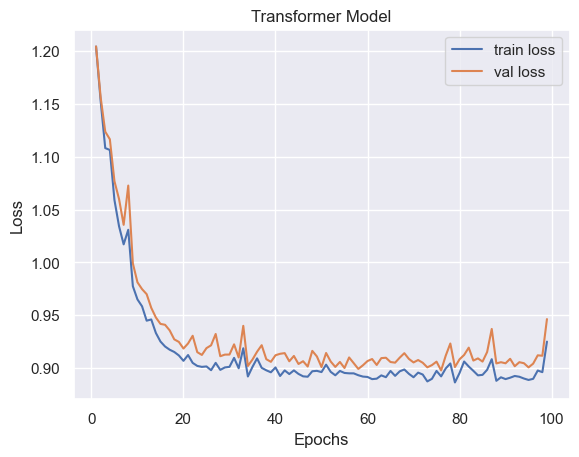

In [450]:
train_loss = [val_curve_t[x]['train'] for x in val_curve_t.keys() if x>0]
val_loss = [val_curve_t[x]['val'] for x in val_curve_t.keys() if x>0]
epochs_x = [x for x in val_curve_t.keys() if x>0]
plt.title('Transformer Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs_x, train_loss, label='train loss')
plt.plot(epochs_x, val_loss, label='val loss')
plt.legend(loc='best')

### Save the Pytorch Model weights

In [380]:
path = os.getcwd()
model_1_path = path + '/med_dos_pain'
torch.save(model.state_dict(), model_1_path)
print('Saved in ', model_1_path)

### Load Pytorch trained weights for Inference

In [382]:
n_features = 8
model = TransformerModel( tabular_feature_dim=n_features, 
                         num_heads=n_heads, hidden_dim=32, num_layers=2)
model.load_state_dict(torch.load(model_1_path))
model.eval()

/Users/sajin/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


TransformerModel(
  (visual_encoder): Linear(in_features=0, out_features=0, bias=True)
  (tabular_encoder): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (transformer_encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
    )
    (linear1): Linear(in_features=32, out_features=128, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=128, out_features=32, bias=True)
    (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAtte

## Inference Model on sample batches
## ==============================================

In [440]:
fun_tran= lambda x: [int(y) if y!=1 else 0 for y in np.exp( 5*np.log( [k if k>0 else 1 for k in x.flatten()] ) ) ]

#Sample a batch from test dataset
xb, dosage_y, medicine_class_y,pain_cls_y = get_batch('test')

# Predict
_, _, _,_, pred_dosage, pred_medicine_class, pred_pain_cls = model( xb)

#Scalers and Encoders
encoder = LabelEncoder()
medicine_encoded = encoder.fit(data.Medication)
encoder = LabelEncoder()
pain_encoded = encoder.fit(data.Label)
dosage_scaler = scaler.fit( data['Dosage_mg_1'].to_numpy().reshape(-1,1) )

#Tuple for result valdiation Prediction vs Actual
medicine_tuple = zip(medicine_encoded.inverse_transform(pred_medicine_class),medicine_encoded.inverse_transform(medicine_class_y) )
pain_tuple = zip(pain_encoded.inverse_transform(pred_pain_cls),pain_encoded.inverse_transform(pain_cls_y) )
dosage_tuple = zip(fun_tran(dosage_scaler.inverse_transform(pred_dosage.detach().numpy()) ), 
                   fun_tran(dosage_scaler.inverse_transform(dosage_y.detach().numpy().reshape(-1,1)) ) )

print('Pred    =>       Actual ')
print('==========================')
for a,b in (medicine_tuple):
    print(a,'      ',b)

print('==========================')
print('Pred    =>       Actual ')
print('==========================')
for a,b in (dosage_tuple):
    print(a,'      ',b)

print('==========================')
print('Pred    =>       Actual ')
print('==========================')
for a,b in (pain_tuple):
    print(a,'      ',b)


Inference Mode
Pred    =>       Actual 
Duloxetone        Tramadol
Tramadol        Duloxetone
Fentanyl Patch        Fentanyl Patch
oxycodone        oxycodone
X        X
X        X
Aspirin        Aspirin
Aspirin        Aspirin
X        X
Hydromorphone        Hydromorphone
Hydromorphone        Hydromorphone
Duloxetone        Duloxetone
X        X
Fentanyl Patch        Fentanyl Patch
Ibuprofen        Ibuprofen
Tylenol        Tylenol
Hydromorphone        Hydromorphone
Aspirin        Aspirin
Hydromorphone        Hydromorphone
Tramadol        Tramadol
Fentanyl Patch        Fentanyl Patch
Hydromorphone        Hydromorphone
Tramadol        Duloxetone
oxycodone        Diclophinac
Hydromorphone        Hydromorphone
oxycodone        Diclophinac
Morphine        Morphine
Aspirin        Aspirin
Duloxetone        Duloxetone
Hydromorphone        Hydromorphone
oxycodone        Diclophinac
Fentanyl Patch        Fentanyl Patch
Pred    =>       Actual 
137        99
86        99
36        50
57        29


## Use Embedding Layer

In [404]:
import torch
import torch.nn as nn

# Define the input dimension and the output dimension of the embedding layer
input_dim = 10
embedding_dim = 64

# Create the embedding layer
embedding = nn.Embedding(input_dim, embedding_dim)

# Define the input data
input_data = torch.randint(low=0, high=input_dim, size=(32, input_dim))

# Feed the input data to the embedding layer
embedded_data = embedding(input_data)

# Print the shape of the embedded data
print(embedded_data.shape)


torch.Size([32, 10, 64])


In [412]:
# hyperparameters
batch_size = 16 # how many independent feature vectors will we process in parallel?
n_epochs = 100
max_iters = (X_train.shape[0]//batch_size) + 1 #10000
eval_interval = 200
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = int(X_train.shape[0]/batch_size)
dropout = 0.0
n_heads = 4

num_classes = len(y_train.Medication.unique())
n_pain_cls = len(y_train.Label.unique())

n_embed = 64

print(num_classes,' Medicine classes ', n_pain_cls,' Pain Classes ',n_tab_features,' Features',torch.cuda.is_available())

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

@torch.no_grad()
def estimate_loss():
    out = {}
    model_E.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        losses_dosage_y = torch.zeros(eval_iters)
        losses_medicine_class = torch.zeros(eval_iters)
        losses_pain_class = torch.zeros(eval_iters)
        acc = torch.zeros(eval_iters)
        medicine_class_acc = torch.zeros(eval_iters)
        pain_class_acc = torch.zeros(eval_iters)
        for k in range(eval_iters):
            
            #Sample a batch
            X, dosage_reg_y, med_class_y, pain_class_y = get_batch(split)
            
            # Predict
            total_loss,dosage_regr_loss, med_class_loss,pain_cls_loss,pred_dosage_y, pred_cls_y, pred_cls_pain = model_E([], X, dosage_reg_y, med_class_y, pain_class_y)
            
            # Compute loss and accuracy
            accuracy = (torch.sum( pred_cls_y == med_class_y)/len(med_class_y) )*100
            accuracy_pain_cls = (torch.sum( pred_cls_pain == pain_class_y)/len(pain_class_y) )*100
            medicine_class_acc[k] = accuracy
            pain_class_acc[k] = accuracy_pain_cls
            losses[k] = total_loss.item()
            losses_dosage_y[k] = dosage_regr_loss.item()
            losses_medicine_class[k] = med_class_loss.item()
            losses_pain_class[k] = pain_cls_loss.item()
        out[split] = losses.mean()
        out['loss_dosage'] = losses_dosage_y.mean()
        out['loss_medication'] = losses_medicine_class.mean()
        out['medicine_class_acc'] = medicine_class_acc.mean()
        out['loss_pain_cls'] = losses_pain_class.mean()
        out['pain_cls_acc'] = pain_class_acc.mean()
        
    model_E.train()
    return out

class Transformermodel_E(nn.Module):
    def __init__(self, visual_embedding_dim, v_hidden_dim, tabular_feature_dim, num_heads, hidden_dim, num_layers):
        super(Transformermodel_E, self).__init__()

        #Create Embedding Layer
        self.embedding_data = nn.Embedding(tabular_feature_dim, n_embed)

        # Tabular data encoder
        self.tabular_encoder = nn.Sequential(
            nn.Linear(tabular_feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Transformer encoder
        #input_hidden_dim = hidden_dim + v_hidden_dim
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(n_embed, num_heads, dim_feedforward=4*hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers)

        # Output layer
        self.output_layer = nn.Linear(n_embed, 1) # Regressor Head
        
        #Classification Layer
        self.output_layer1 = nn.Linear(n_embed, num_classes)
        self.output_layer_pain_cls = nn.Linear(n_embed, n_pain_cls)

    def forward(self, visual_input, tabular_input, dos_tgt = None, med_cls_tgt=None, pain_cls_tgt=None):

        # Tabular data encoding
        #tabular_embedding = self.tabular_encoder(tabular_input)
        tabular_embedding = self.embedding_data(tabular_input)
        tabular_embedding = tabular_embedding.permute(1, 0, 2)
        
        # Concatenate visual and tabular embeddings
        print('before concat =>',tabular_embedding.shape)

        combined_embedding = tabular_embedding

        # Transformer encoding
        transformer_output = self.transformer_encoder(combined_embedding)

        # Regressor Head layer
        regression_output = self.output_layer(transformer_output)
        
        # Medicine Classification Layer
        op_med_cls = self.output_layer1(transformer_output)
        op_med_cls = torch.softmax(op_med_cls,dim=1)
        pred_med_cls = torch.argmax(op_med_cls, dim = 1)
        
        # Pain Classification Layer
        op_pain_cls = self.output_layer_pain_cls(transformer_output)
        op_pain_cls = torch.softmax(op_pain_cls,dim=1)
        pred_pain_cls = torch.argmax(op_pain_cls, dim = 1)
        
        if (med_cls_tgt is None) or (dos_tgt is None) or (pain_cls_tgt is None):
            print('Inference Mode')
            loss, regression_loss, med_cls_loss, pain_cls_loss = None, None, None, None
        else:
            loss_fn = nn.SmoothL1Loss()  # mean square error
            regression_loss = loss_fn(regression_output, dos_tgt.view(-1,1))
            
            #Medicine Classification Loss
            med_cls_loss = nn.CrossEntropyLoss()(op_med_cls, med_cls_tgt )
            
            #pain_class loss
            pain_cls_loss = nn.CrossEntropyLoss()(op_pain_cls, pain_cls_tgt )
            
            #Total loss
            weight_dosage, weight_med_cls = 0.2, 0.4
            loss = weight_dosage * regression_loss + weight_med_cls * med_cls_loss + (1-(weight_dosage+weight_med_cls))*pain_cls_loss
        return loss,regression_loss,med_cls_loss,pain_cls_loss, regression_output, pred_med_cls, pred_pain_cls


# model_E

#print(model_E)

model_E = Transformermodel_E(visual_embedding_dim=0, v_hidden_dim=0, tabular_feature_dim=X_train.shape[1], 
                         num_heads=n_heads, hidden_dim=16, num_layers=2)
m = model_E.to(device)
#model_E = model_E.to(device)
# print the number of parameters in the model_E
print(sum(p.numel() for p in m.parameters())/1e3, 'K parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model_E.parameters(), lr=learning_rate)

visual_input = []
val_curve_t = {}
import time
run_time = 0
print('Training for ',n_epochs,' epochs with iterations ', max_iters)

for epoch in range(n_epochs):
    for iter in range(max_iters):
        
        # sample a batch of data
        xb, dosage_y, med_cls_y, pain_cls_y = get_batch('train')
        
        # evaluate the loss
        loss,_,_,_,_,_, _ = model_E( [],xb, dosage_y, med_cls_y, pain_cls_y)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # Evaluate the loss at then end of epoch on training and val set
    losses = estimate_loss()
    val_curve_t[epoch] = losses
    run_time = run_time + (time.time() - t0)
    print(f"Epoch{epoch}:step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}\
,loss dosage {losses['loss_dosage']:.4f},loss Medication {losses['loss_medication']:.4f}\
, Acc Medication:{losses['medicine_class_acc']:.2f} , Acc Pain:{losses['pain_cls_acc']:.2f}" )

print(f"Run Time {(run_time/n_epochs):.2f}")


11  Medicine classes  4  Pain Classes  8  Features False
77.616 K parameters
Training for  100  epochs with iterations  168


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

In [89]:
import torch
import torch.nn as nn

# size of input (N x C) is = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# every element in target should have 0 <= value < C
target = torch.tensor([1, 0, 4])

m = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()
output = nll_loss(m(input), target)
output.backward()

print('input: ', input.shape, m(input))
print('target: ', target)
print('output: ', output)

input:  torch.Size([3, 5]) tensor([[-2.3863, -2.4541, -2.6134, -0.4161, -2.4168],
        [-1.4283, -2.0612, -1.8804, -1.1128, -1.8850],
        [-2.4482, -3.1675, -2.5457, -0.5262, -1.5986]],
       grad_fn=<LogSoftmaxBackward0>)
target:  tensor([1, 0, 4])
output:  tensor(1.8270, grad_fn=<NllLossBackward0>)


In [90]:
target.dtype

torch.int64